In [1]:
import pandas as pd
import numpy as np

# df = pd.read_csv('housing_market_dataset.csv')
df = pd.read_csv("Customer-Churn-Records.csv")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_selector


In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df = df.drop(columns=['RowNumber','CustomerId'])
df = df.rename(columns={'Card Type': 'CardType'})
df = df.rename(columns={'Point Earned': 'PointsEarned'})
df = df.rename(columns={'Geography': 'Country'})
df = df.rename(columns={'Satisfaction Score': 'SatisfactionScore'})
df.head()

,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointsEarned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
numeric_column_selector = make_column_selector(dtype_include=np.number)
num_cols = numeric_column_selector(df)
print(num_cols)

object_column_selector = make_column_selector(dtype_include='object')
object_cols = object_column_selector(df)
object_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'SatisfactionScore', 'PointsEarned']


['Surname', 'Country', 'Gender', 'CardType']

<font color='0FF00'> Let us now look for some multivariate patterns

Since there are so many combinations, i will look at the combinations where i think i might find something useful

 </font>

In [12]:
# Specify the order of columns
new_order = ['Exited'] + [col for col in df.columns if col != 'Exited']

# Reindex the DataFrame with the new order of columns
df = df.reindex(columns=new_order)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'Exited'),
  Text(1.5, 0, 'CreditScore'),
  Text(2.5, 0, 'Age'),
  Text(3.5, 0, 'Tenure'),
  Text(4.5, 0, 'Balance'),
  Text(5.5, 0, 'NumOfProducts'),
  Text(6.5, 0, 'HasCrCard'),
  Text(7.5, 0, 'IsActiveMember'),
  Text(8.5, 0, 'EstimatedSalary'),
  Text(9.5, 0, 'Complain'),
  Text(10.5, 0, 'Satisfaction Score'),
  Text(11.5, 0, 'PointsEarned')])

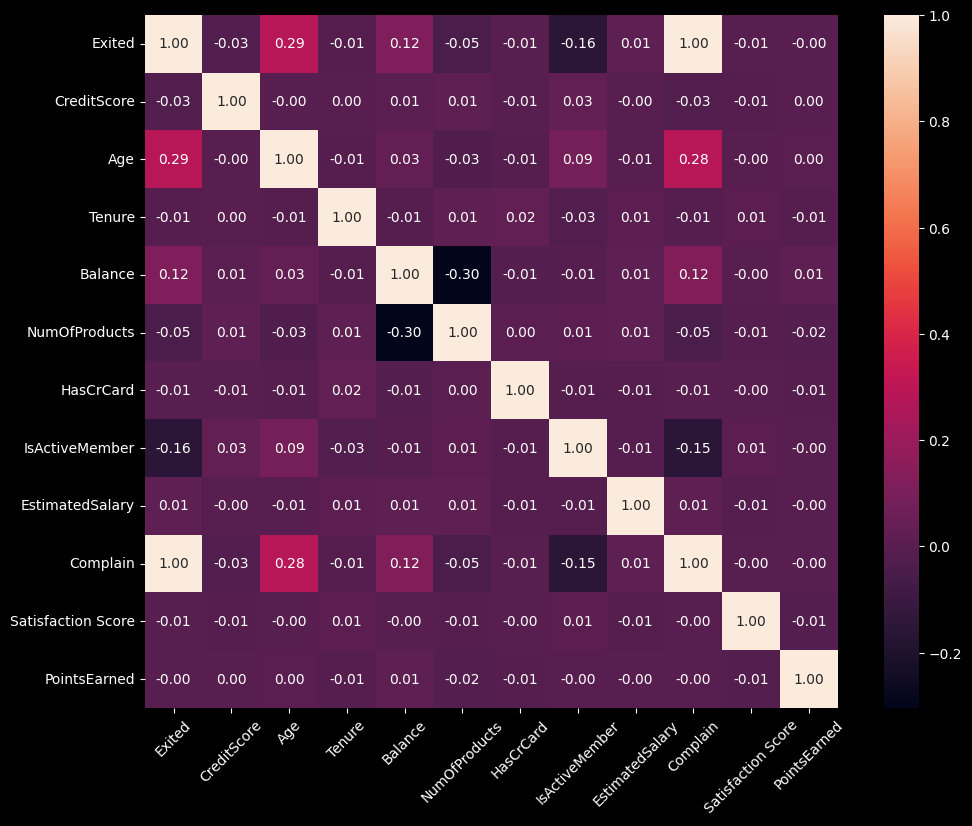

In [12]:
df_num_col = df[num_cols]
df_num_col_ordered = df_num_col[['Exited'] + [col for col in df_num_col.columns if col != 'Exited']]


corrmat = df_num_col_ordered.corr()
f, ax = plt.subplots(figsize=(12, 9))
# plt.xticks(rotation=45)
# sns.heatmap(corrmat, vmax=.8, square=False)
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.xticks(rotation=45)

Observations

<font color='red'> Exited and Complaint are completely correlated and thus cannot help us with prediction. Seems suspicous that it would be totally one to one (no one get good help after they complained?) This also makes Satisfaction score highly unreliable as well</font>

<font color='red'> Since complain has not correlation at all to Exited , we would have dropped it anyways. Seems like the bank as very bad customer service </font>

<font color='#87CEEB'> Age shows a positive correlation. So older customers may be more likely to exit

Age has a significant correlation with complain (funny when you think of the stereotype of old people complaining),
so it might be to hasty to remove that feature. </font>

<font color='green'> Balance and NumofProducts have a negative correlation. This could mean that if you have lots of saved money, then you are not as interested in the banks other products (need to explore this). 

I find it odd that Estimated Salary is not correlated with NumOfProducts, considering that Balance is. </font>


Overall, most features how a very low correlation with the target feature. Is it due to target feature being binary? Or does it mean that most features are of equal importance? Point Earned is the only one that has zero correlation with the target feature so it might be worth dropping Point_Earned as well.

In [ ]:
# Les see if 'Exited' and 'Complain' are really one to one.
result = df[df['Exited'] != df['Complain']]
print(len(result))
result
# Interesting, there are a few rows where 'Exited' does not correspond to 'Complain'
#* 14 rows of 10_000 total is just 0.14%
#* I can see no pattern of these rows. 
#* I will test later if the model can predict these rows even without the Complain feature
#* For now i wil drop it Complain


In [16]:
df = df.drop(columns=['Complain'])


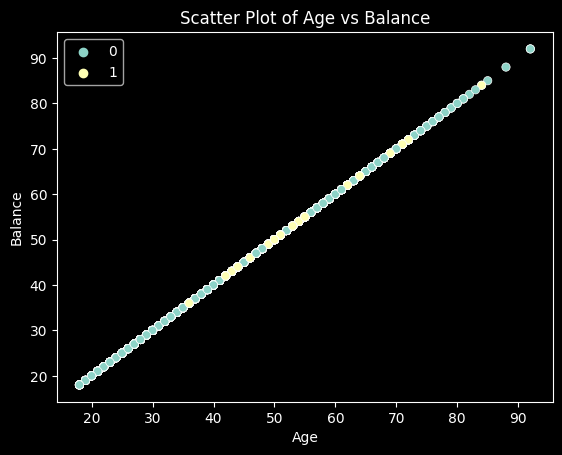

In [21]:
#! Age is rather correlated with Exited
sns.scatterplot(data=df, x='Age', y='Age', hue='Exited')
plt.title('Scatter Plot of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
sns.set_palette("pastel")
plt.legend()
plt.show()

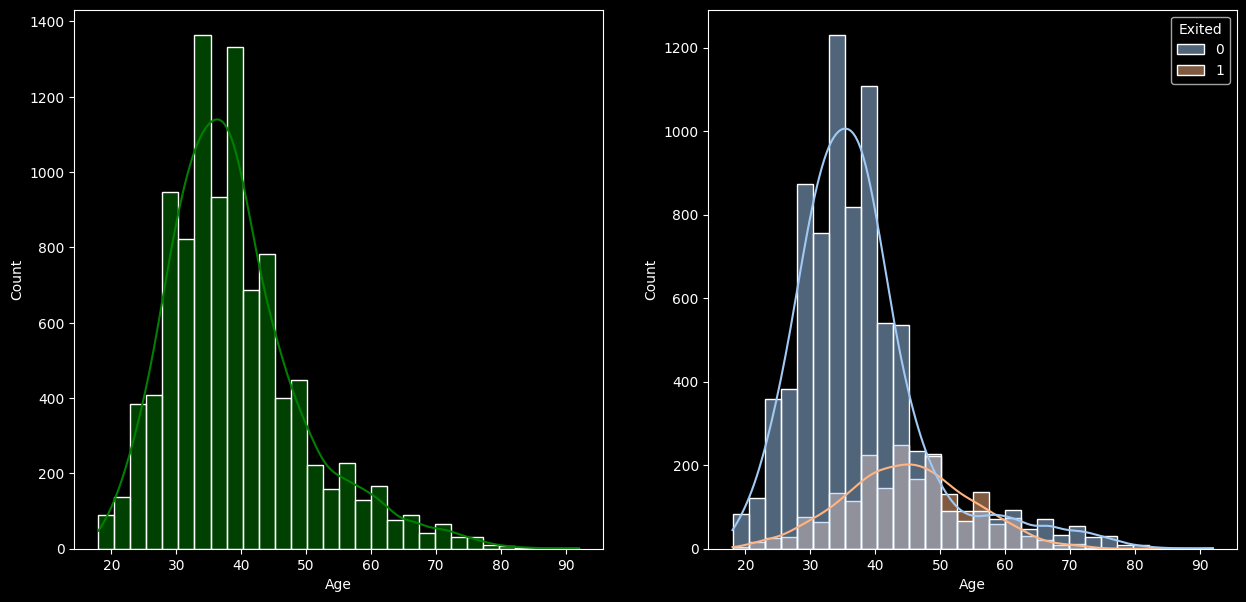

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Age',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Age', bins=30, kde=True,hue='Exited')
plt.show()

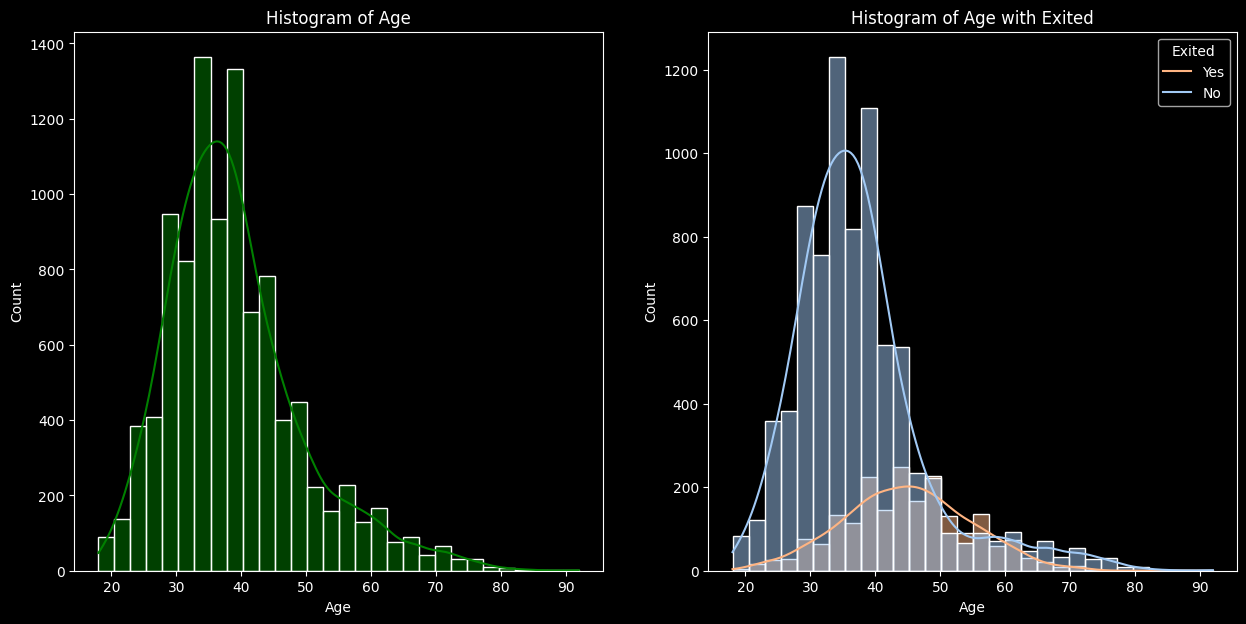

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot
plt.subplot(121)
sns.histplot(data=df, x='Age', bins=30, kde=True, color='g')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')

# Second subplot
plt.subplot(122)
sns.histplot(data=df, x='Age', bins=30, kde=True, hue='Exited')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age with Exited')

# Add legend
plt.legend(title='Exited', labels=['Yes', 'No'])

# Show the plot
plt.show()

#* People in the age span of around 40-50 years of age are the most likely to exit


In [ ]:
sns.histplot(data=df, x='Age', bins=30, kde=True, hue='Exited')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age with Exited')

# Add legend
plt.legend(title='Exited', labels=['Yes', 'No'])

# Show the plot
plt.show()


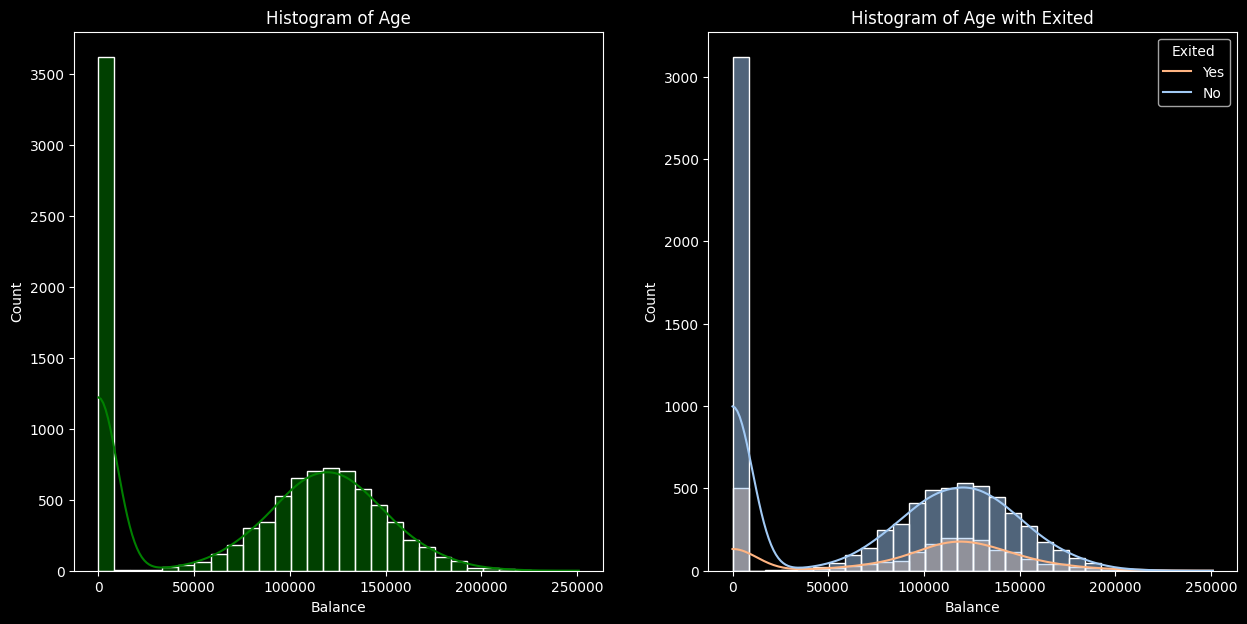

In [33]:
#* Balance has a small correlation with Exited.

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='Balance', bins=30, kde=True, color='g')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Histogram of Age')

plt.subplot(122)
sns.histplot(data=df, x='Balance', bins=30, kde=True, hue='Exited')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Histogram of Age with Exited')

plt.legend(title='Exited', labels=['Yes', 'No'])
plt.show()

# * Besides the zero-focused balance that we saw before there is not real pattern of Exited with having more or less balance in your account


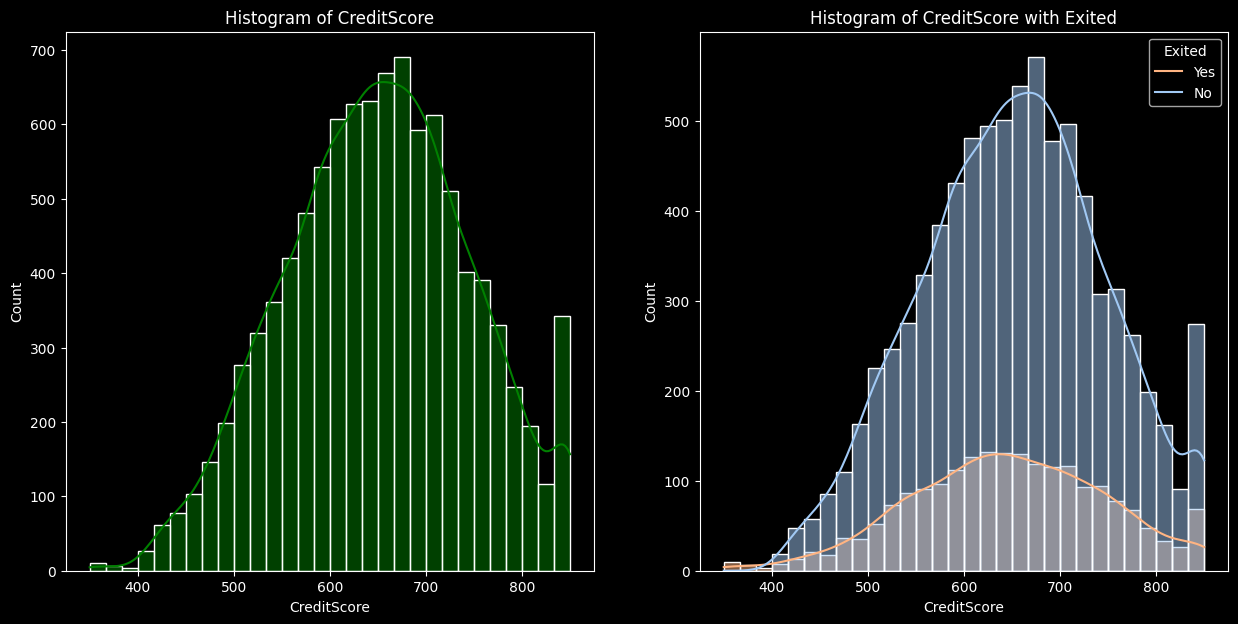

In [60]:
#* Let us look at credit score

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot
plt.subplot(121)
sns.histplot(data=df, x='CreditScore', bins=30, kde=True, color='g')
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.title('Histogram of CreditScore')

# Second subplot
plt.subplot(122)
sns.histplot(data=df, x='CreditScore', bins=30, kde=True, hue='Exited')
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.title('Histogram of CreditScore with Exited')

# Add legend
plt.legend(title='Exited', labels=['Yes', 'No'])

# Show the plot
plt.show()

#* The Proportion of exited seems to be the same throughout the distribution.

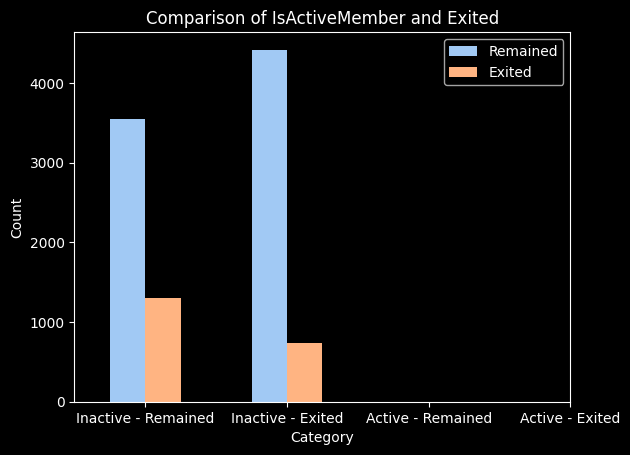

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the data in a DataFrame called 'df'
# with 'IsActiveMember' and 'Exited' as the two boolean variables

# Calculate the counts for each combination of IsActiveMember and Exited
counts = df.groupby(['IsActiveMember', 'Exited']).size().unstack()

# Define the labels for the x-ticks
labels = ['Inactive - Remained', 'Inactive - Exited', 'Active - Remained', 'Active - Exited']

# Plot a grouped bar chart
counts.plot(kind='bar', stacked=False)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Comparison of IsActiveMember and Exited')
plt.xticks(range(len(labels)), labels, rotation=0)
plt.legend(labels=['Remained', 'Exited'])

# Show the plot
plt.show()


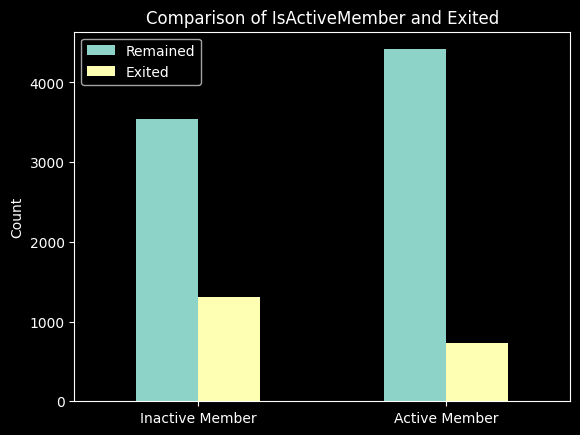

In [15]:
#* IsActiveMember has a small negative correlation with Exited 

# Create a groupby
counts = df.groupby(['IsActiveMember', 'Exited']).size().unstack()

# Define the X-labels
labels = ['Inactive Member', 'Active Member']

# Plot a grouped bar chart
counts.plot(kind='bar', stacked=False)

# Set labels and title
plt.xlabel('')
plt.ylabel('Count')
plt.title('Comparison of IsActiveMember and Exited')
plt.xticks(range(len(labels)), labels, rotation=0)
plt.legend(labels=['Remained', 'Exited'])

# Show the plot
plt.show()

#* Looks like a rather significant pattern of Active Members being less likely to exit
# Still , would help a lot with insight if we knew what constituted active and not-active membership

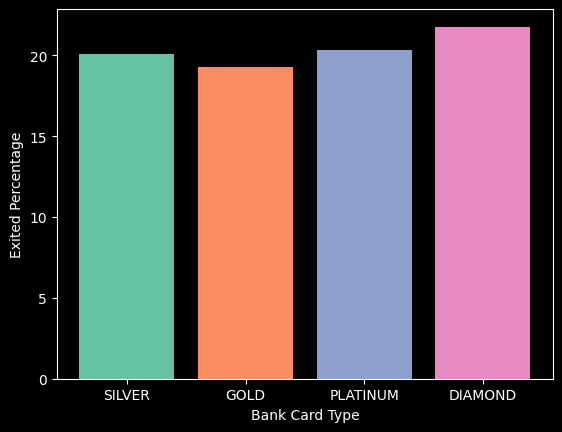

In [19]:
#
#* Let us take a closer look at some of the categorical features

# Calculate the survival percentage for each value of 'CardType'
card_exited_groupby = df.groupby('CardType')['Exited'].mean() * 100

# This is the order of 'level' of the credit card. Diamond being the best.
category_order = ['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']

# Reorder the categories in the survival_percentage Series
card_exited_groupby = card_exited_groupby.reindex(category_order)

# Set a color palette
color_palette = sns.color_palette('Set2', n_colors=len(category_order))

# Create a bar chart with the specified color palette
plt.bar(card_exited_groupby.index, card_exited_groupby.values, color=color_palette)

# Set labels and title
plt.xlabel('Bank Card Type')
plt.ylabel('Exited Percentage')
# plt.title('Survival Percentage by CardType')

# Show the plot
plt.show()

# * no noticeable correlation between  
# * Very slight more likelyhood of exiting if a customer has a Diamond card

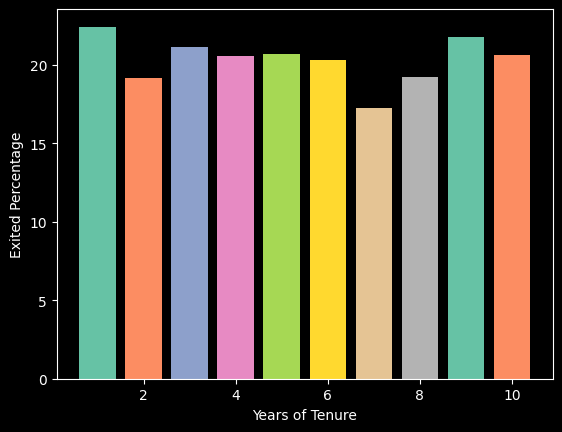

In [38]:
# Calculate the exit percentage for year of tenure
tenure_exited_groupby = df.groupby('Tenure')['Exited'].mean() * 100

# Not really necessary to do...
category_order = [1,2,3,4,5,6,7,8,9,10,11]

# Reorder the categories in the survival_percentage Series
tenure_exited_groupby = tenure_exited_groupby.reindex(category_order)

# Set a color palette
color_palette = sns.color_palette('Set2', n_colors=len(category_order))

# Create a bar chart with the specified color palette
plt.bar(tenure_exited_groupby.index, tenure_exited_groupby.values, color=color_palette)

# Set labels and title
plt.xlabel('Years of Tenure')
plt.ylabel('Exited Percentage')
# plt.title('Survival Percentage by CardType')

# Show the plot
plt.show()

In [36]:
df.head()

,Exited,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,CardType,PointsEarned
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,0,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456
2,1,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,0,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,0,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


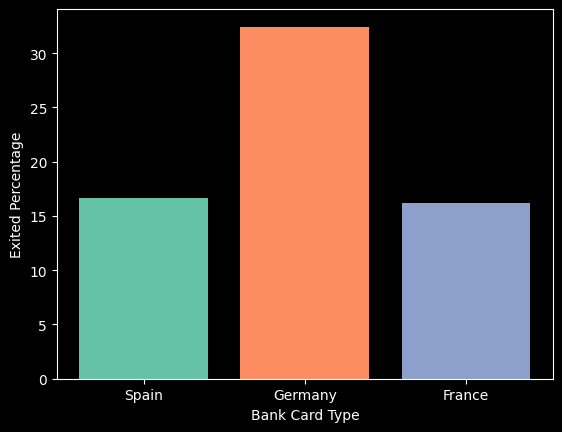

In [56]:
# Calculate the exited/churn percentage for each value of 'CardType'
country_exited_groupby = df.groupby('Country')['Exited'].mean() * 100

# This is the order of countries to be plotted
category_order = ['Spain', 'Germany', 'France']

# Reorder the categories in the survival_percentage Series
country_exited_groupby = country_exited_groupby.reindex(category_order)

# Set a color palette
color_palette = sns.color_palette('Set2', n_colors=len(category_order))

# Create a bar chart with the specified color palette
plt.bar(country_exited_groupby.index, country_exited_groupby.values, color=color_palette)

# Set labels and title
plt.xlabel('Bank Card Type')
plt.ylabel('Exited Percentage')
# plt.title('Exit percentage of between countries')

# Show the plot
plt.show()

# * Very significant! German customers are much more likely to exit the bank.

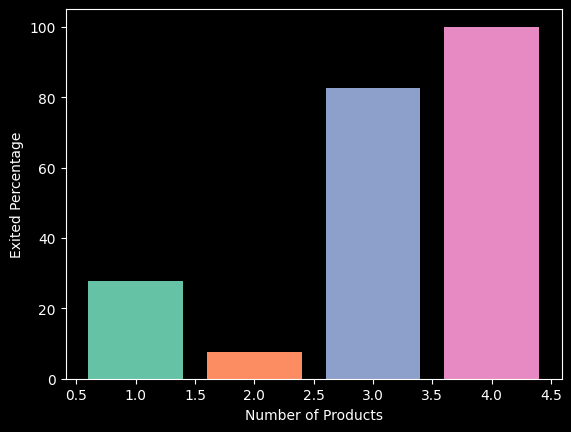

In [54]:
# NumOfProducts

# Calculate the exited/churn percentage for number of Products used/bought 
product_exited_groupby = df.groupby('NumOfProducts')['Exited'].mean() * 100

# The plotting order
category_order = [1,2,3,4]

# Reorder the categories in the card_exited_groupby Series
product_exited_groupby = product_exited_groupby.reindex(category_order)

# Set a color palette
color_palette = sns.color_palette('Set2', n_colors=len(category_order))

# Create a bar chart with the specified color palette
plt.bar(product_exited_groupby.index, product_exited_groupby.values, color=color_palette)

# Set labels and title
plt.xlabel('Number of Products')
plt.ylabel('Exited Percentage')

# Show the plot
plt.show()

# * Very significant! All customers that had 4 products left AND most that had 3 products exited as well
# * Looks like the bank may be loosing their most active users

In [47]:
df.NumOfProducts.value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [14]:
df.SatisfactionScore.value_counts()

SatisfactionScore
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64

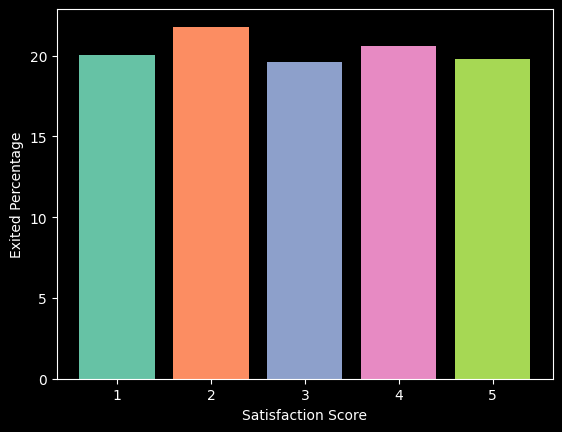

In [23]:
# SatisfactionScore

# Calculate the exited/churn percentage for satisfaction score rating
satisfaction_exited_groupby = df.groupby('SatisfactionScore')['Exited'].mean() * 100

# The plotting order
category_order = [1,2,3,4,5]

# Reorder the categories in the card_exited_groupby Series
satisfaction_exited_groupby = satisfaction_exited_groupby.reindex(category_order)

# Set a color palette
color_palette = sns.color_palette('Set2', n_colors=len(category_order))

# Create a bar chart with the specified color palette
plt.bar(satisfaction_exited_groupby.index, satisfaction_exited_groupby.values, color=color_palette)

# Set labels and title
plt.xlabel('Satisfaction Score')
plt.ylabel('Exited Percentage')

# Show the plot
plt.show()

#* About the same exit proportion for each SatisfactionScore category. 
#* This feature is pretty suspect though, since we know most leave after filing a complaint.


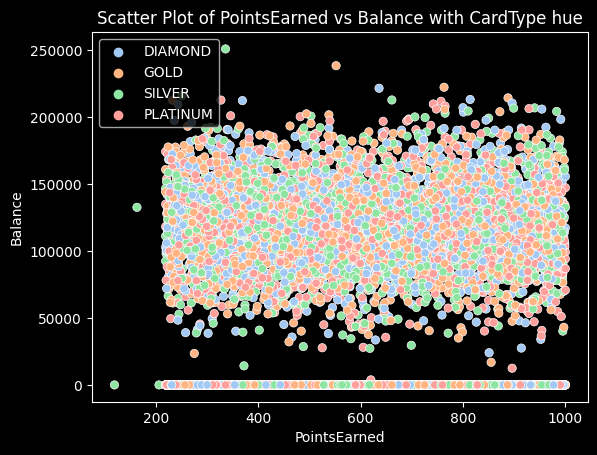

In [8]:
#* Lets see how the different economic features are related

sns.scatterplot(data=df, x='PointsEarned', y='Balance', hue='CardType')
plt.title('Scatter Plot of PointsEarned vs Balance with CardType hue')
plt.xlabel('Points Earned')
plt.ylabel('Balance')
sns.set_palette("pastel")
plt.legend()
plt.show()

#* You can have many points with very little Balance. Perhaps the points are saved up?
#* There does not seem to be any clear relationship between, PointsEarned, Balance, and CardType 


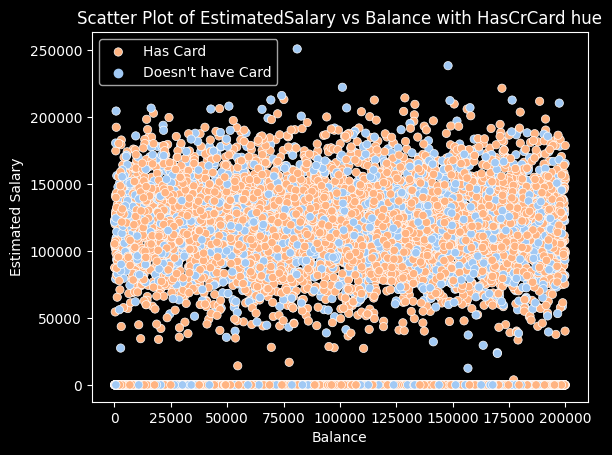

In [12]:
#* Lets see how the different economic features are related

sns.scatterplot(data=df, x='EstimatedSalary', y='Balance', hue='HasCrCard')
plt.title('Scatter Plot of EstimatedSalary vs Balance with HasCrCard hue')
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
sns.set_palette("pastel")
plt.legend(labels=['Has Card', "Doesn't have Card"])

plt.show()

#* Slight chance that the top blue dot is an outlier.
#* There does not seem to be any clear relationship between, EstimatedSalary, Balance, and hasCrCard either.
#* Looks like the economic features could be suitable to be either dropped or combined using PCA


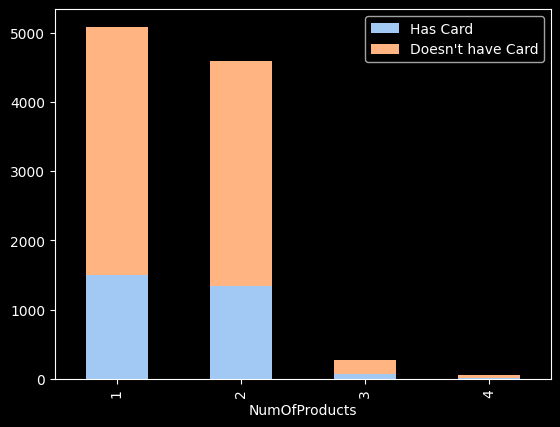

In [17]:
cross_table = pd.crosstab(df['NumOfProducts'], df['HasCrCard'])
cross_table.plot(kind='bar', stacked=True)
plt.legend(labels=['Has Card', "Doesn't have Card"])
plt.show()

#* At least users that buy/use lots of bank products have a credit card

,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointsEarned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


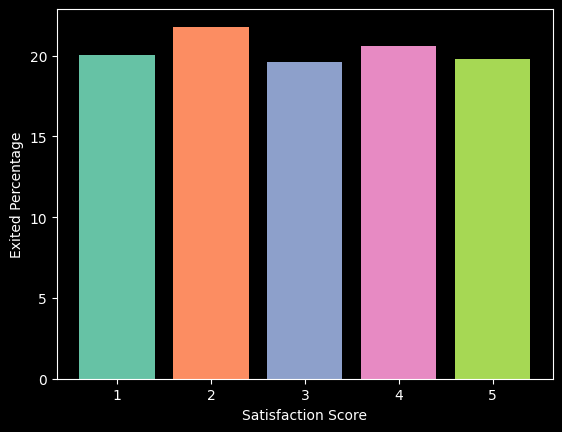

In [19]:
# SatisfactionScore

# Calculate the exited/churn percentage for satisfaction score rating
satisfaction_exited_groupby = df.groupby('SatisfactionScore')['Exited'].mean() * 100

# The plotting order
category_order = [1,2,3,4,5]

# Reorder the categories in the card_exited_groupby Series
satisfaction_exited_groupby = satisfaction_exited_groupby.reindex(category_order)

# Set a color palette
color_palette = sns.color_palette('Set2', n_colors=len(category_order))

# Create a bar chart with the specified color palette
plt.bar(satisfaction_exited_groupby.index, satisfaction_exited_groupby.values, color=color_palette)

# Set labels and title
plt.xlabel('Satisfaction Score')
plt.ylabel('Exited Percentage')

# Show the plot
plt.show()

#* About the same exit proportion for each SatisfactionScore category. 
#* This feature is pretty suspect though, since we know most leave after filing a complaint.

<font color='skyBlue'> 
Lets see if Surname count has a relationship with Exited
</font>

In [22]:

# Filter the DataFrame to include only groups with count > 20
grouped_df = df.groupby('Surname').filter(lambda x: len(x) > 20)

# Calculate the likelihood of exit for each surname
exit_likelihood = grouped_df.groupby('Surname')['Exited'].mean().reset_index()
exit_likelihood.columns = ['Surname', 'Exit_Likelihood']


# Add the column for name count
exit_likelihood['Name_Count'] = grouped_df.groupby('Surname')['Surname'].count().values
exit_likelihood.sort_values('Name_Count', ascending=False, inplace=True)
exit_likelihood.reset_index(inplace=True, drop=True)


# Print the resulting DataFrame
print(exit_likelihood)
print(len(exit_likelihood))

     Surname  Exit_Likelihood  Name_Count
0      Smith         0.281250          32
1     Martin         0.310345          29
2      Scott         0.103448          29
3     Walker         0.142857          28
4      Brown         0.192308          26
5       Shih         0.280000          25
6        Yeh         0.120000          25
7   Genovese         0.160000          25
8    Maclean         0.208333          24
9     Wright         0.250000          24
10        Ma         0.304348          23
11   Fanucci         0.260870          23
12     White         0.260870          23
13    Wilson         0.217391          23
14       Chu         0.136364          22
15        Lu         0.181818          22
16   Johnson         0.272727          22
17      Wang         0.318182          22
18     Moore         0.090909          22
19       Mai         0.142857          21
20  McGregor         0.428571          21
21       Sun         0.142857          21
22  Thompson         0.285714     

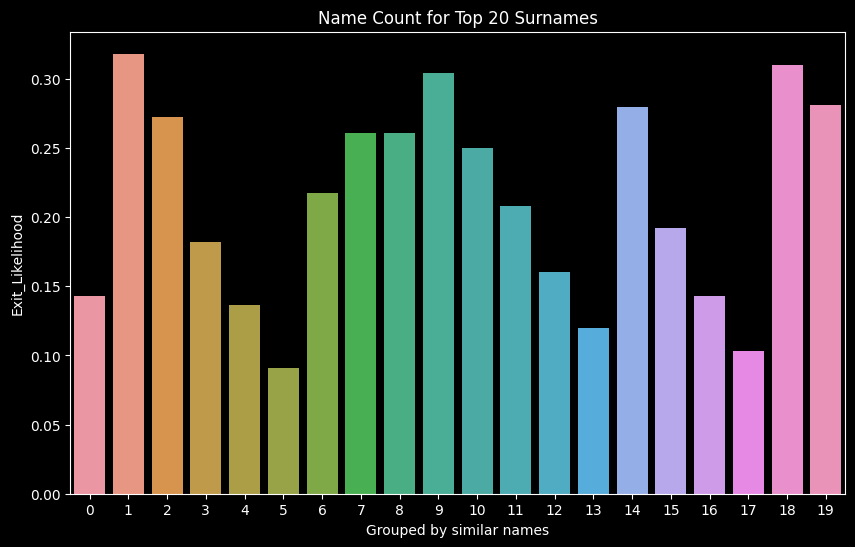

,index,Surname,Exit_Likelihood,Name_Count
0,19,Mai,0.142857,21
1,17,Wang,0.318182,22
2,16,Johnson,0.272727,22
3,15,Lu,0.181818,22
4,14,Chu,0.136364,22


In [23]:
# obs this is the right one!
# if you mess with this one make a back up...

top_20 = exit_likelihood.head(20)

# Add a new column to represent the index of each record
# top_20 = top_20.reset_index()

# Sort the DataFrame by Name_Count
top_20 = top_20.sort_values('Name_Count', ascending=True)
top_20 = top_20.reset_index()


# Plotting the Name_Count and Exit_Likelihood for each surname
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20, x=top_20.index, y='Exit_Likelihood', errorbar=None)
plt.title('Name Count for Top 20 Surnames')
plt.xlabel('Grouped by similar Surnames')
plt.ylabel('Exit_Likelihood')
plt.show()

top_20.head()

In [21]:
# Calculate the proportion of customers who exited for each card type
cardtype_proportions = df.groupby('CardType')['Exited'].mean()

# Print the proportions
print(cardtype_proportions)

CardType
DIAMOND     0.217790
GOLD        0.192646
PLATINUM    0.203607
SILVER      0.201122
Name: Exited, dtype: float64


In [51]:
# Calculate the proportion of customers who exited for each card type
bankProducts_proportions = df.groupby('NumOfProducts')['Exited'].mean()

# Print the proportions
print(bankProducts_proportions)

NumOfProducts
1    0.277144
2    0.076035
3    0.827068
4    1.000000
Name: Exited, dtype: float64


In [19]:
# Calculate the proportion of customers who exited for each card type
bankProducts_proportions = df.groupby('SatisfactionScore')['Exited'].mean()

# Print the proportions
print(bankProducts_proportions)

SatisfactionScore
1    0.200311
2    0.217974
3    0.196376
4    0.206175
5    0.198104
Name: Exited, dtype: float64


In [18]:
# HasCrCard
# Calculate the proportion of customers who exited for each card type
bankProducts_proportions = df.groupby('HasCrCard')['Exited'].mean()

# Print the proportions
print(bankProducts_proportions)

HasCrCard
0    0.208149
1    0.201984
Name: Exited, dtype: float64


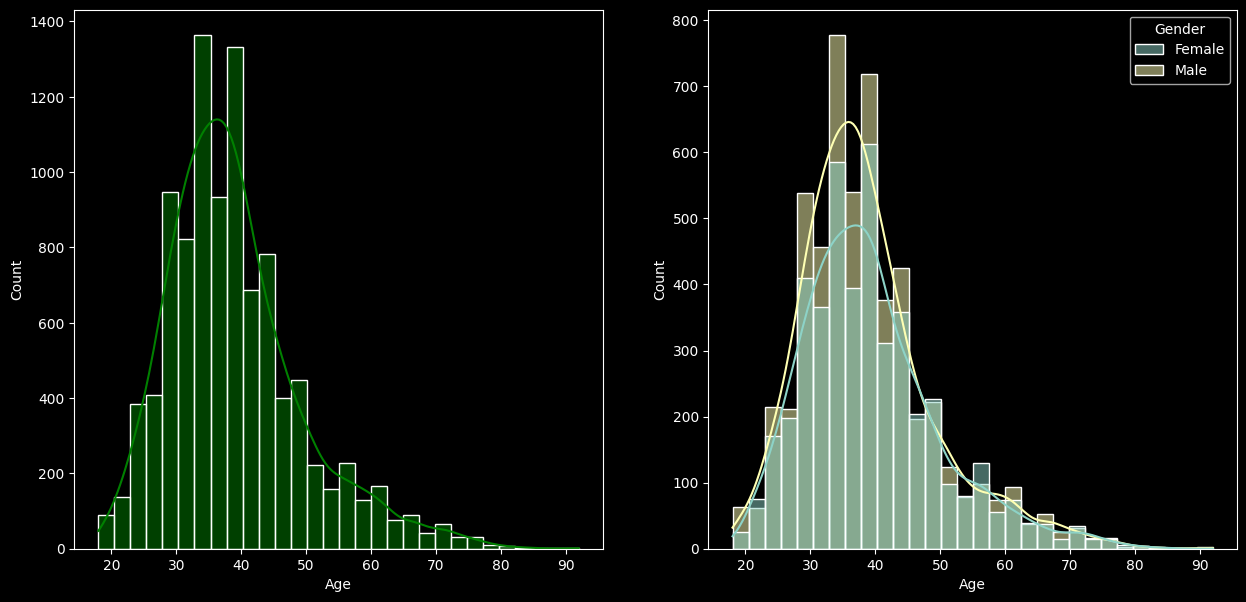

In [8]:


fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Age',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Age', bins=30, kde=True,hue='Gender')
plt.show()



In [18]:
numeric_column_selector = make_column_selector(dtype_include=np.number)
num_cols = numeric_column_selector(df)
num_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Satisfaction Score',
 'PointsEarned']

In [19]:
object_column_selector = make_column_selector(dtype_include='object')
object_cols = object_column_selector(df)
object_cols

['Surname', 'Country', 'Gender', 'CardType']

In [ ]:
# penguins = sns.load_dataset("penguins")
sns.pairplot(df[['Exited', 'Age', 'Tenure', 'Balance', 'PointsEarned']])

In [ ]:
# sns.pairplot(df['Exited'])
sns.pairplot(df[num_cols])

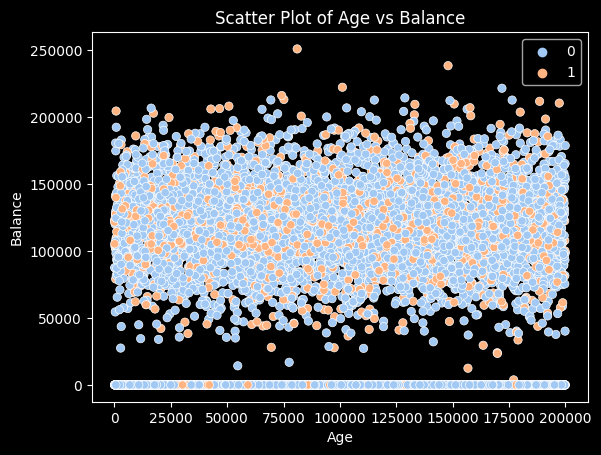

In [15]:
sns.scatterplot(data=df, x='EstimatedSalary', y='Balance', hue='Exited')
plt.title('Scatter Plot of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
sns.set_palette("pastel")
plt.legend()
plt.show()

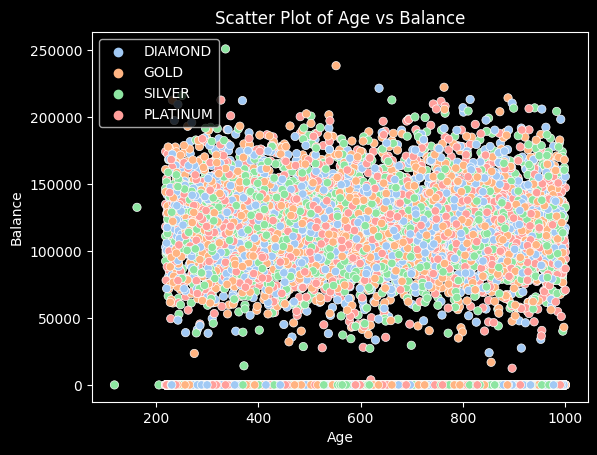

In [31]:
sns.scatterplot(data=df, x='PointsEarned', y='Balance', hue='CardType')
plt.title('Scatter Plot of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
sns.set_palette("pastel")
plt.legend()
plt.show()

In [29]:
df.head()

,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,CardType,PointsEarned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [20]:
corr_matrix = df[num_cols].corr()
# corr_matrix = df.corr(numeric_only=False)
corr_matrix["Exited"].sort_values(ascending=False)

Exited                1.000000
Age                   0.285296
Balance               0.118577
EstimatedSalary       0.012490
PointsEarned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
Tenure               -0.013656
CreditScore          -0.026771
NumOfProducts        -0.047611
IsActiveMember       -0.156356
Name: Exited, dtype: float64